**Segmentasi sel darah menggunakan deteksi tepi canny dan morfologi operasi**

**Menghubungkan Google Drive ke Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library yang Dibutuhkan

*   cv2 Digunakan untuk membaca gambar, mengubah format, dan menerapkan metode segmentasi
*   numpy Untuk operasi numerik pada gambar (karena gambar diproses sebagai array)
*   os Digunakan untuk mencari file dalam folder.
*   matplotlib.pyplot Untuk menampilkan gambar hasil segmentasi.





In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

**Fungsi Segmentasi Sel Darah**

Fungsi ini akan menerapkan teknik segmentasi menggunakan metode:


*   Adaptive Thresholding Untuk meningkatkan kontras sel darah
*   Canny Edge Detection Untuk mendeteksi tepi sel darah
*   Morphological Operations Untuk membersihkan noise pada hasil segmentasi





In [3]:
def segment_blood_cells(image_path, threshold1=100, threshold2=200):
    # Baca gambar dalam grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Adaptive Thresholding untuk meningkatkan kontras
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    # Deteksi tepi dengan Canny Edge Detection
    edges = cv2.Canny(adaptive_thresh, threshold1, threshold2)

    # Morphological Operations untuk memperbaiki hasil segmentasi
    kernel = np.ones((3,3), np.uint8)
    edges_cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Tampilkan hasil
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(adaptive_thresh, cmap='gray')
    ax[1].set_title('Adaptive Thresholding')
    ax[1].axis('off')

    ax[2].imshow(edges_cleaned, cmap='gray')
    ax[2].set_title('Segmented (Canny + Morphology)')
    ax[2].axis('off')

    plt.show()

**Fungsi untuk Memproses Semua Gambar**

In [4]:
def process_folder(folder_path):
    # List semua file dalam folder
    file_names = os.listdir(folder_path)
    file_paths = [os.path.join(folder_path, file) for file in file_names if file.endswith(('.png', '.jpg', '.jpeg'))]

    # Proses setiap gambar
    for image_path in file_paths:
        print(f"Memproses: {image_path}")
        segment_blood_cells(image_path)


**Menjalankan Segmentasi untuk Semua Gambar**

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-2.png


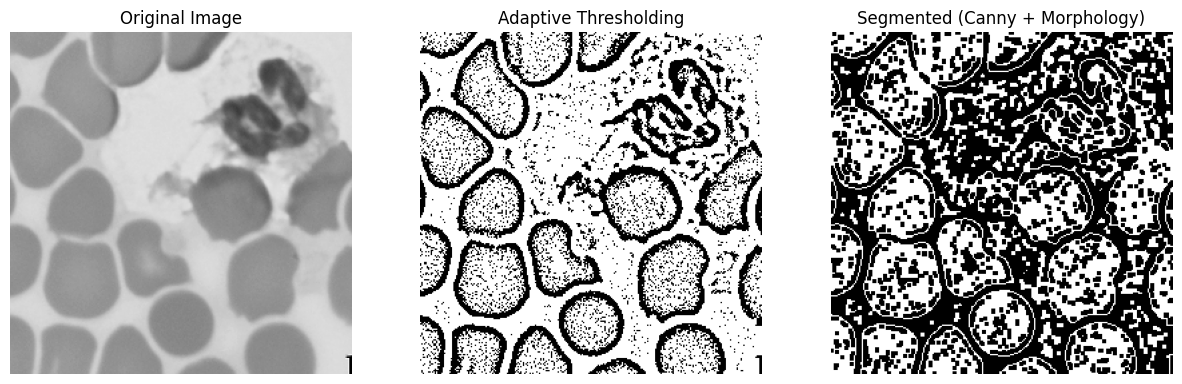

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-10.png


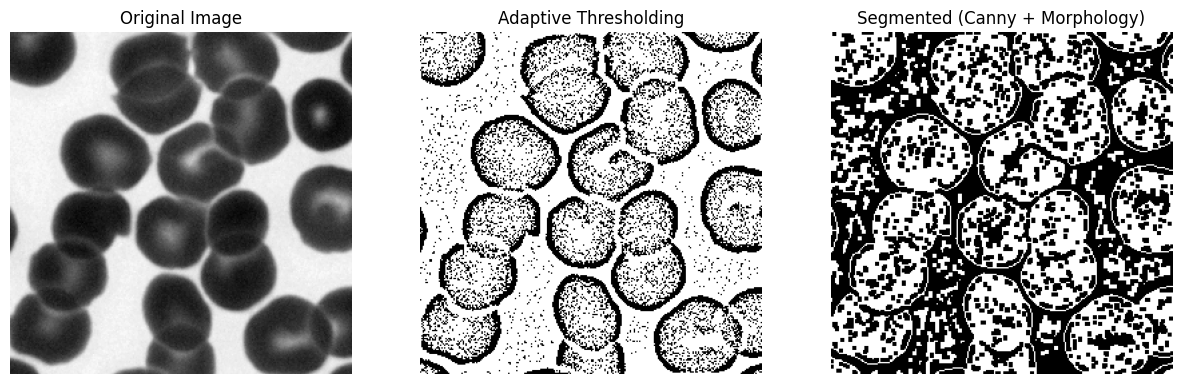

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-11.png


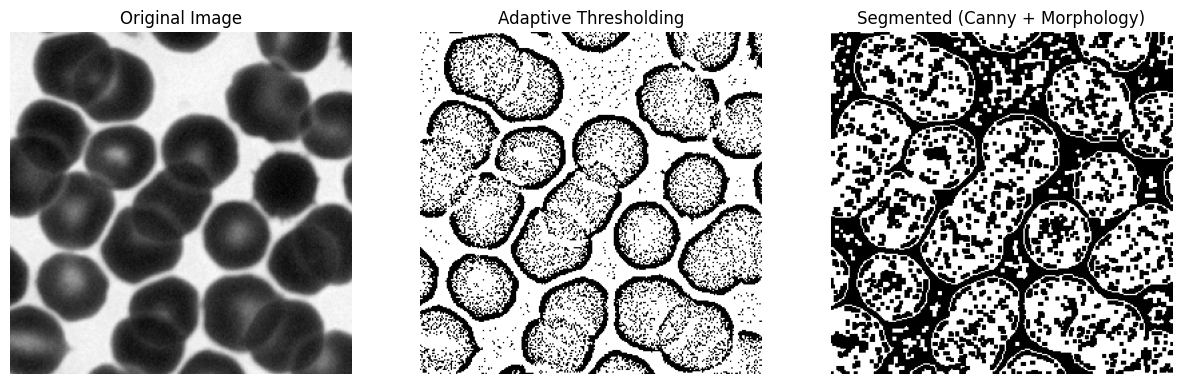

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-17.png


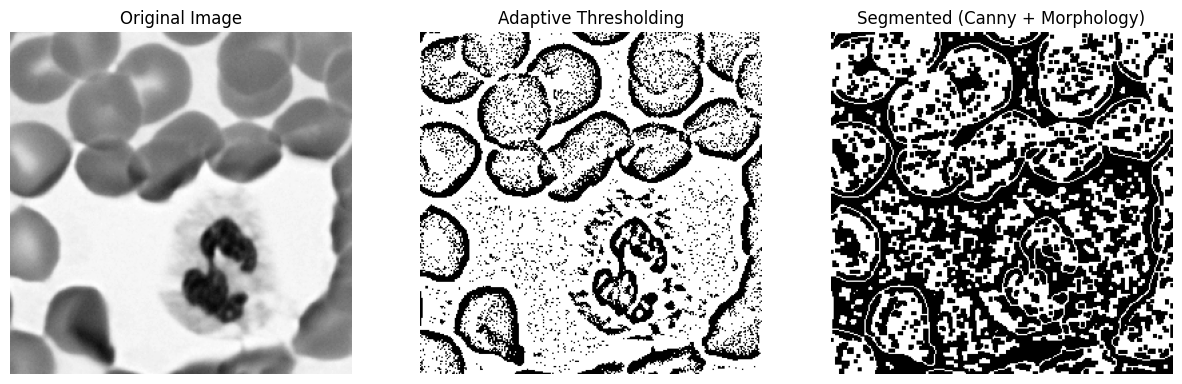

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-12.png


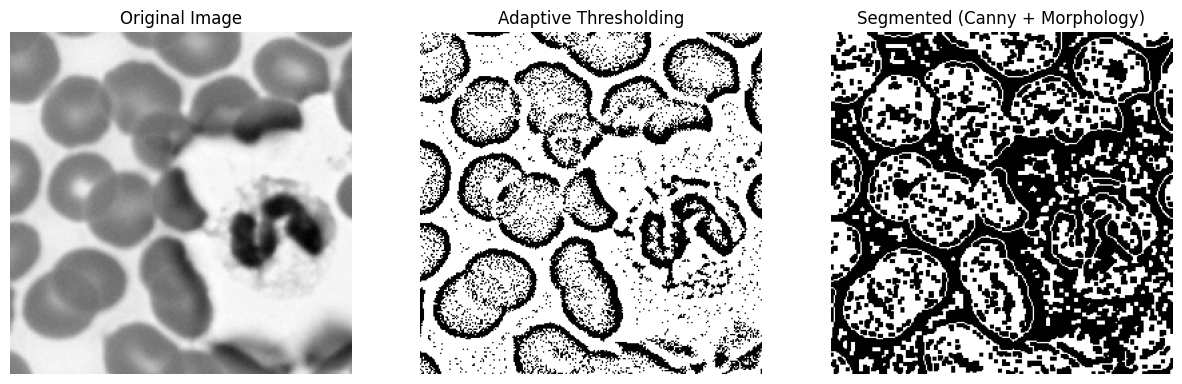

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-18.png


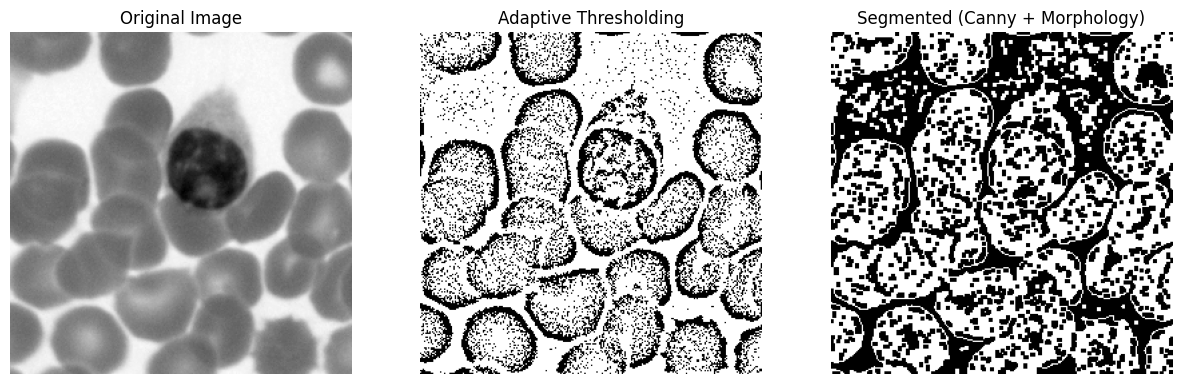

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-14.png


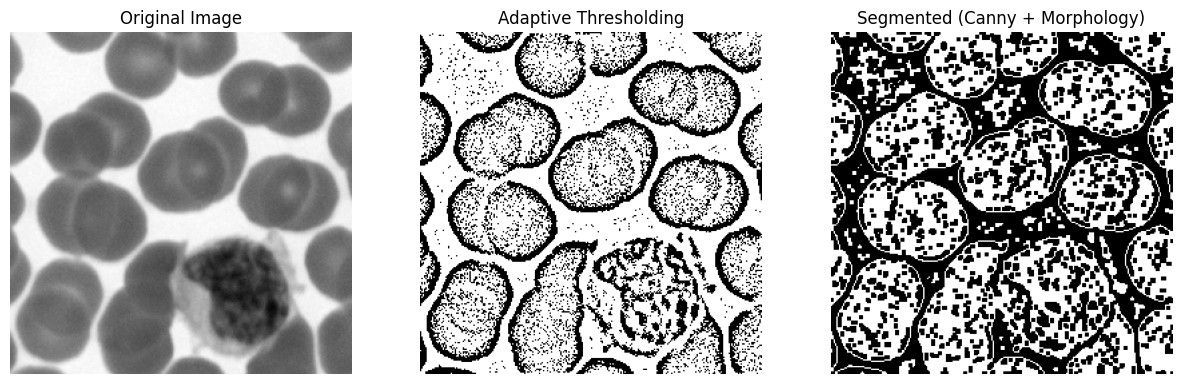

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-1.png


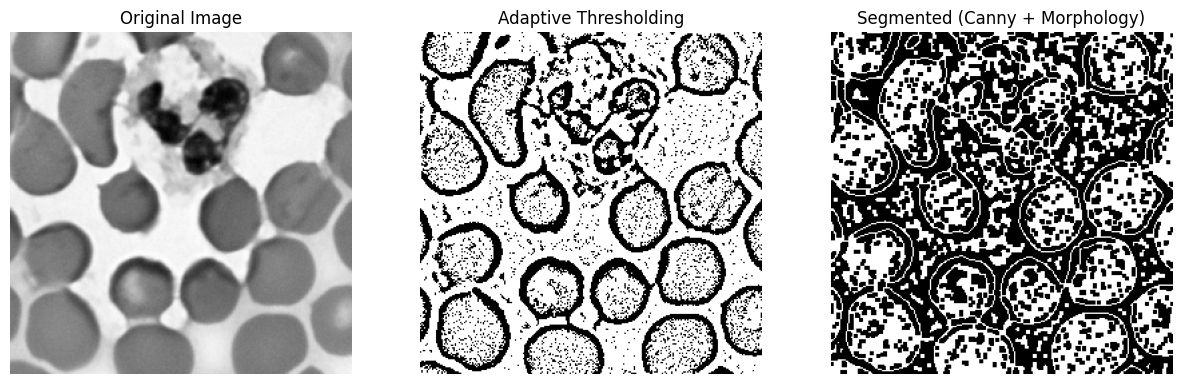

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-19.png


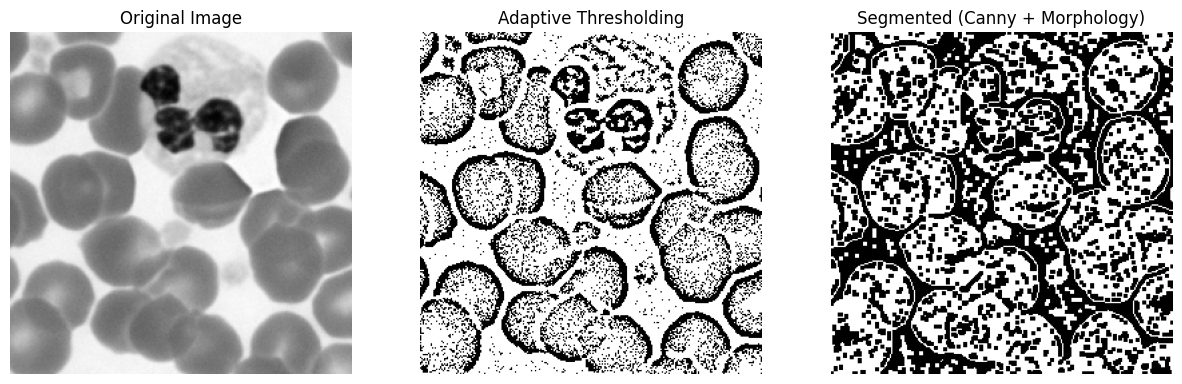

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-7.png


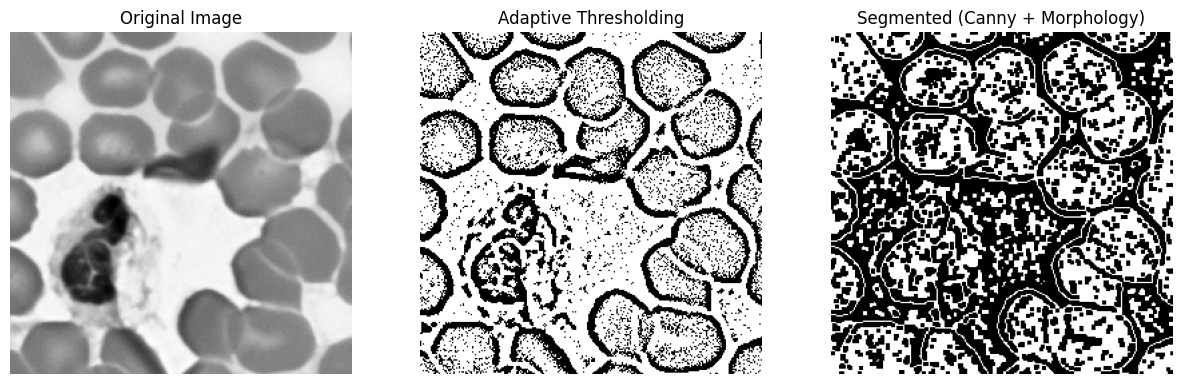

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-4.png


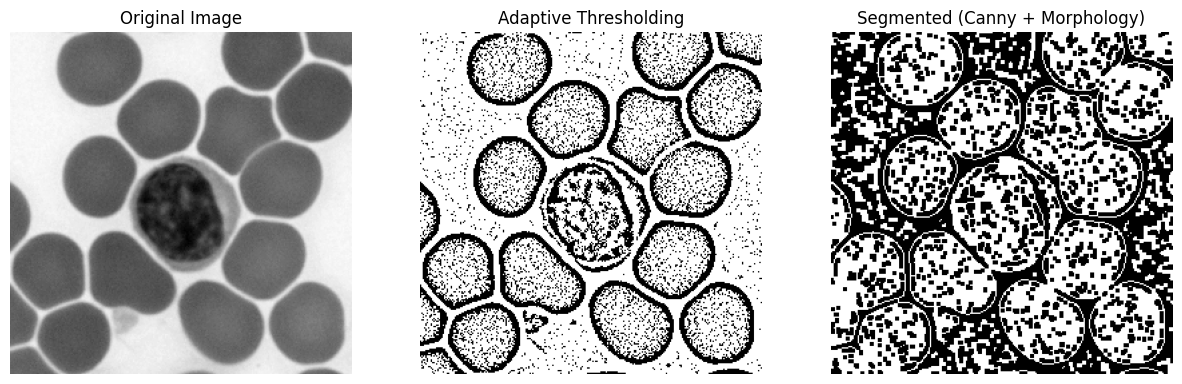

Memproses: /content/drive/MyDrive/Pengenalan pola/archive2/images/image-8.png


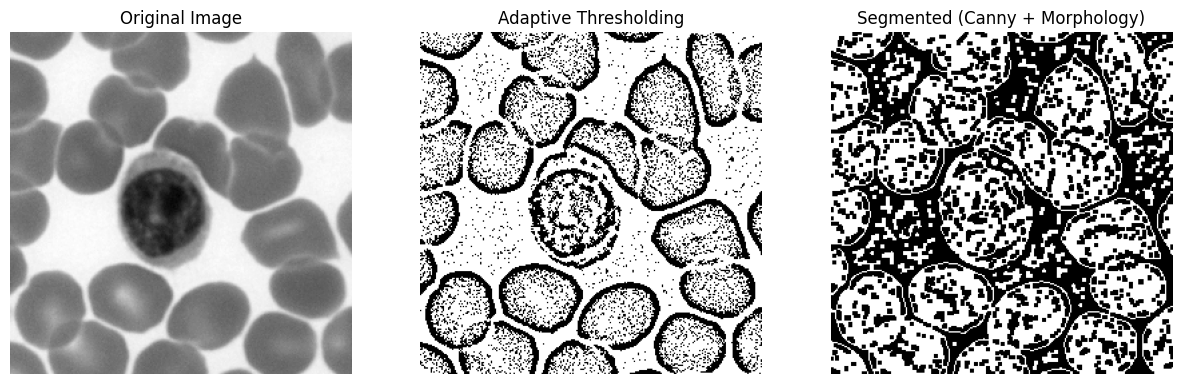

In [5]:
#load folder
folder_path = "/content/drive/MyDrive/Pengenalan pola/archive2/images"
process_folder(folder_path)
